<a href="https://colab.research.google.com/github/ZachGermain/DSPS_zgermain/blob/master/HW2_2_zgermain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Written by Federica B. Bianco @fedhere
UDel DSPS 2019

Zachariah Germain

 # Homework 2

 This is a skeleton & instruction notebook

-  GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), 
 _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
-  For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well). 
-  Describe the behavior you see in the plots in terms of the law of large numbers.
-  PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
 Extra Credit: FIT a gaussian to the distribution of means            

In [1]:
from __future__ import print_function
__author__= 'fbb'

import pylab as pl
# this package sets up pretty plots
from scipy.optimize import curve_fit, minimize
    
%pylab inline
import seaborn
seaborn.set_style("darkgrid")


Populating the interactive namespace from numpy and matplotlib


## choose which distributions to use 

In [0]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['chisq','lnorm', 'pois', 'binomial','geom']


## and which mean to give it

In [0]:
mymean = 100

# Let's see what this distribution looks like, what is the PDF, and how are the moments defined. Wikipedia is great for this! 

![1](https://github.com/fedhere/DSPS/blob/master/HW2/chisq1.png?raw=1)

![2](https://github.com/fedhere/DSPS/blob/master/HW2/chisq2.png?raw=1)

# Then lets look at the numpy random sampling package to see how I create the distribution
http://docs.scipy.org/doc/numpy/reference/routines.random.html
http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.chisquare.html#numpy.random.chisquare



In [0]:
# the chi sq distribution takes the number of degrees of freedom, which luckily is the same as the mean!
df = mymean

## I am making a dictionary to host the distributions.

that is only one possible option. with a dictionary I can easily inspect the distribution I want by its name: it is a very human friendly data storage. In this example I am only using a single distribution, so for me it is overkill, but if I were doing the whole exercise with 5 or 6 distributions it would be useful!

Lets start by looking at a single chi sq distribution

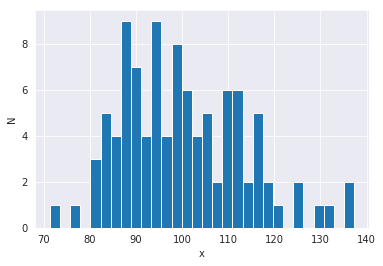

In [7]:
# Note: I am adding imports here, to show the workflow: 
# at this point I realize what packages I need and I import them. 
# but this is a PEP8 violation. 
# It is a good habit to put the includes at the top 
# so the code fails right away if the packages are missing. 
# Otherwise a user may have a piece of code running for a long time, 
# and then fail when the package cannot be imported... 
# (unless they are only imported under conditions, e.g. in an if statement)

import numpy as np
np.random.seed(456)
md = {}
# md is an empty disctionary; 
# if you are not familiar with python dictionaries see https://www.pythonforbeginners.com/dictionary/how-to-use-dictionaries-in-python
md['chisq'] = np.random.chisquare(mymean, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x');

### Figure 1: Chi sq distribution of a sample of size 100 for a Chi square distribution with  100 degrees of freedom. 

## let numpy calculate what the mean and stdev of this distribution are

In [8]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 100.09, standard deviation: 13.24


## Now let's do it for 100 Chisq distributions
we want distributions of different sizes (all integers between 10 and 2000). It's a good idea to create more small distributions, cause, as we will see, their means will be more noisy (due to the law of large numbers which we will discuss in class)

In [9]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print ("shape of the 'size' list that contains the size of each distribution", mysize.shape)

shape of the 'size' list that contains the size of each distribution (99,)


Text(0, 0.5, 'size of the array')

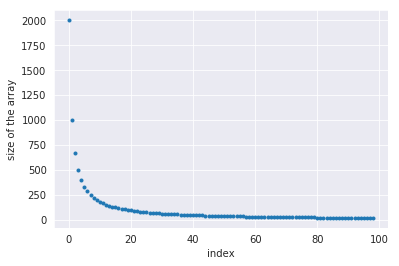

In [10]:
pl.plot(mysize, '.')
pl.xlabel("index")
pl.ylabel("size of the array")

Text(1259.3999999999999, 100, 'expected mean')

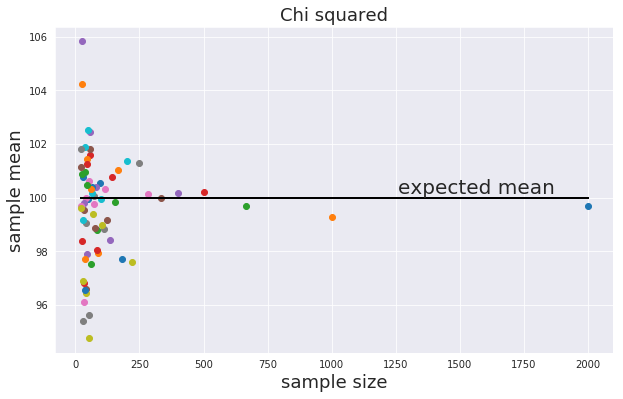

In [24]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['chisq'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

### Figure 2: [describe what you see and how it relates to the law of large numbers]

# now the histogram of the mean of all samples: 
## this requires some data wrangling, since i put the data in a dictionary which is a user friendly data structure, but perhaps not the most machine friendly one

a coder friendly, though not terribly pythonic way to do it is to append each mean in a list in a for loop, and then hist that. be careful: if your data size gets large this becomes a very bad idea!!

Text(0, 0.5, 'N')

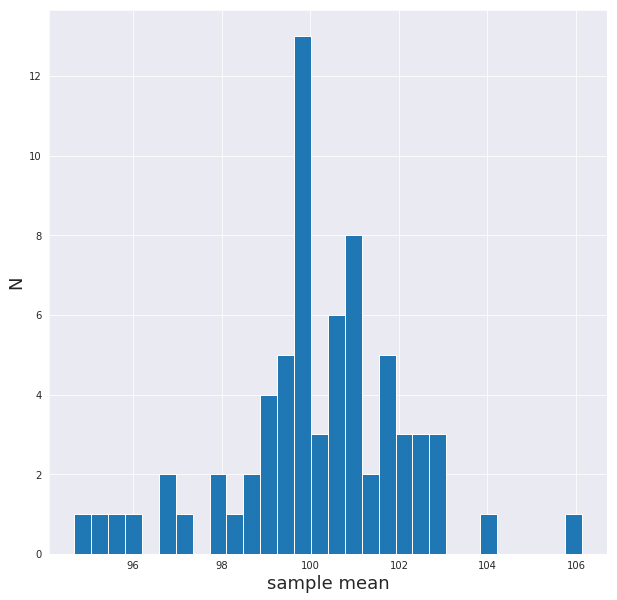

In [12]:
allmeans = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

## Figure 3: [...]

# Do it for the Normal distribution


Text(0, 0.5, 'N')

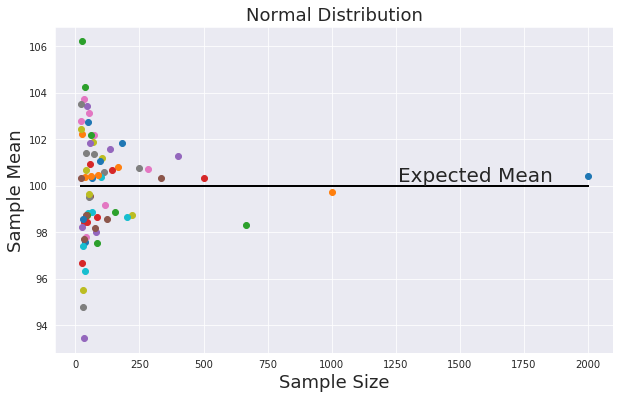

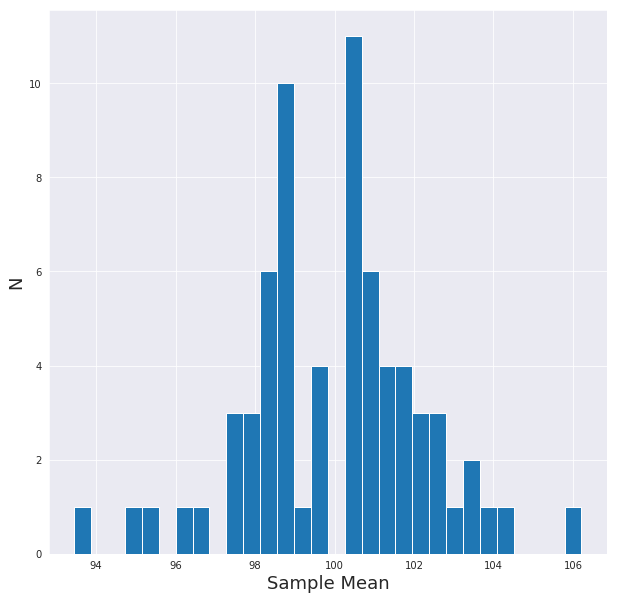

In [44]:
#Finding Parameters based on chi-square example and mymean=100
normMu = mymean #Mean
normVar = 14 #Variance

#Makes it reproducible and deterministic
np.random.seed(700)

#Make the lnorm dictionary entry a nested dictionary
md['lnorm'] = {} 

#Reuse mysize as array for dictionary entries
for n in mysize:
    #Stores each sample size as dict key, vale is an array of mysize length
    md['lnorm'][n] = np.random.normal(loc = normMu, scale = normVar, size = n)

md['lnorm']['means'] = {} #Creation of means entry array for plotting
axlnorm_mu_n = pl.figure(figsize=(10,6)).add_subplot(111) #Initialization of plot

#For loop iterates over all dictionary entries for the lnorm
for entry in md['lnorm']:
    #This asks if the dictionary entry is a string
      #The sample sizes are also stored as dictionary elements so this lets you
      #work with these while having the ease of strings for other information
      #inside dictionary
    if not type(entry) == str:
        md['lnorm']['means'][entry] = md['lnorm'][entry].mean()
        #and plot it
        #Plots the mean just found as a circle
        axlnorm_mu_n.plot(entry, md['lnorm']['means'][entry], 'o')
        #Plot Labels
        axlnorm_mu_n.set_xlabel('Sample Size', fontsize=18)
        axlnorm_mu_n.set_ylabel('Sample Mean', fontsize=18)
        axlnorm_mu_n.set_title('Normal Distribution', fontsize=18)
        #Creats line plot for the expected mean
        #Extends from the smallest value of mysize to largest
        #Both endpoints equal mean so it plots a horizontal line
        #The k style marker marks the line as black
        axlnorm_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')
        
#After for loop, labels the horizontal line
axlnorm_mu_n.text(axlnorm_mu_n.get_xlim()[1] * .6, 100, "Expected Mean", 
                  va="bottom", fontsize=20)

###############################################################################
#BEGIN HISTOGRAM
#Creates list of means for histogram
allmeans = list(md['lnorm']['means'].values())
#Initalize histogram
pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('Sample Mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

# Do it for the Poisson distribution

Text(0, 0.5, 'N')

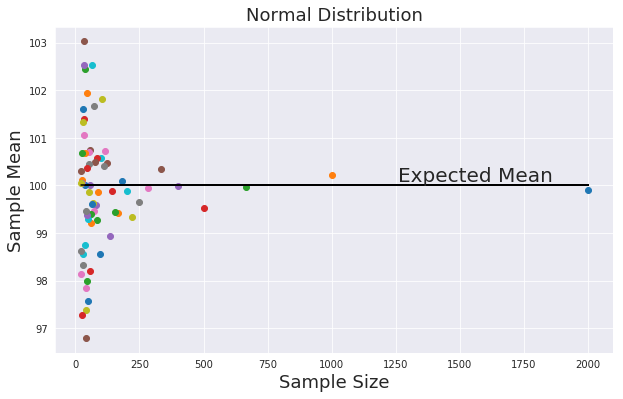

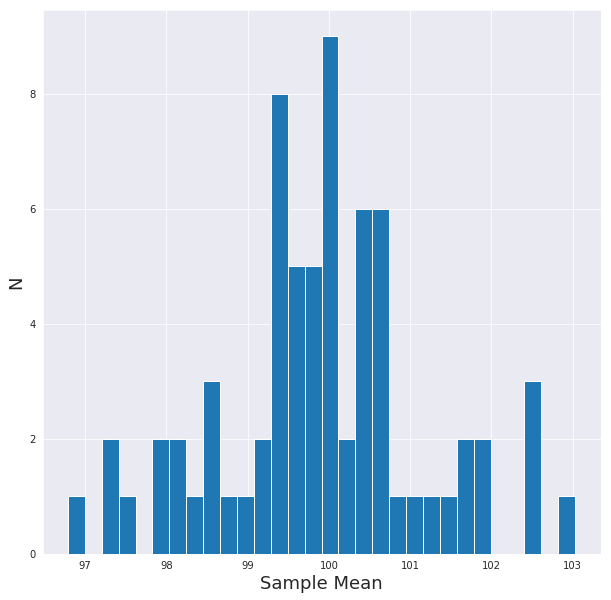

In [45]:
#Finding Parameters based on chi-square example and mymean=100
poisLamda = mymean #Mean
poisVar = np.sqrt(mymean) #Variance

#Makes it reproducible and deterministic
np.random.seed(701)

#Make the lnorm dictionary entry a nested dictionary
md['pois'] = {} 

#Reuse mysize as array for dictionary entries
for n in mysize:
    #Stores each sample size as dict key, vale is an array of mysize length
    md['pois'][n] = np.random.poisson(lam = poisLamda, size = n)

md['pois']['means'] = {} #Creation of means entry array for plotting
axpois_mu_n = pl.figure(figsize=(10,6)).add_subplot(111) #Initialization of plot

#For loop iterates over all dictionary entries for the lnorm
for entry in md['pois']:
    #This asks if the dictionary entry is a string
      #The sample sizes are also stored as dictionary elements so this lets you
      #work with these while having the ease of strings for other information
      #inside dictionary
    if not type(entry) == str:
        md['pois']['means'][entry] = md['pois'][entry].mean()
        #and plot it
        #Plots the mean just found as a circle
        axpois_mu_n.plot(entry, md['pois']['means'][entry], 'o')
        #Plot Labels
        axpois_mu_n.set_xlabel('Sample Size', fontsize=18)
        axpois_mu_n.set_ylabel('Sample Mean', fontsize=18)
        axpois_mu_n.set_title('Normal Distribution', fontsize=18)
        #Creats line plot for the expected mean
        #Extends from the smallest value of mysize to largest
        #Both endpoints equal mean so it plots a horizontal line
        #The k style marker marks the line as black
        axpois_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')
        
#After for loop, labels the horizontal line
axpois_mu_n.text(axpois_mu_n.get_xlim()[1] * .6, 100, "Expected Mean", 
                  va="bottom", fontsize=20)

###############################################################################
#BEGIN HISTOGRAM
#Creates list of means for histogram
allmeans = list(md['pois']['means'].values())
#Initalize histogram
pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('Sample Mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

# Do it for the Binomial distribution

Text(0, 0.5, 'N')

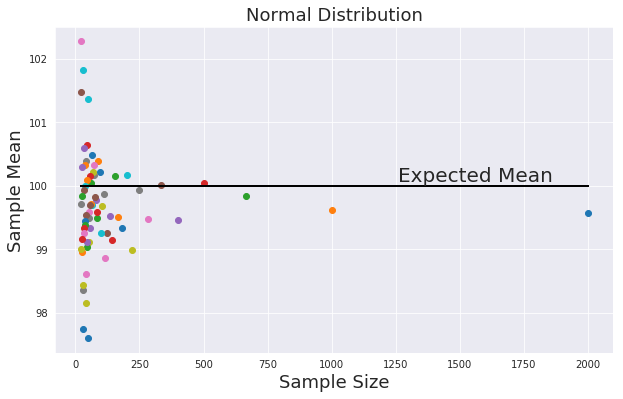

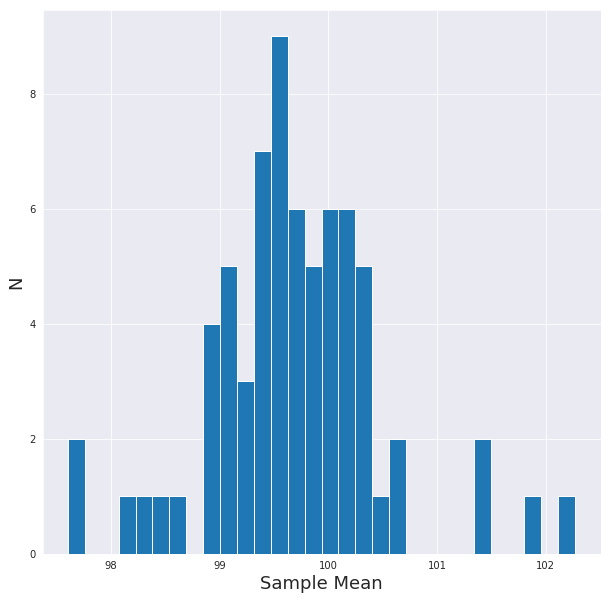

In [46]:
#Finding Parameters based on chi-square example and mymean=100
binp = 0.702
binn = mymean/binp

#Makes it reproducible and deterministic
np.random.seed(702)

#Make the lnorm dictionary entry a nested dictionary
md['binomial'] = {} 

#Reuse mysize as array for dictionary entries
for n in mysize:
    #Stores each sample size as dict key, vale is an array of mysize length
    md['binomial'][n] = np.random.binomial(n = binn, p = binp, size = n)

md['binomial']['means'] = {} #Creation of means entry array for plotting
axbin_mu_n = pl.figure(figsize=(10,6)).add_subplot(111) #Initialization of plot

#For loop iterates over all dictionary entries for the lnorm
for entry in md['binomial']:
    #This asks if the dictionary entry is a string
      #The sample sizes are also stored as dictionary elements so this lets you
      #work with these while having the ease of strings for other information
      #inside dictionary
    if not type(entry) == str:
        md['binomial']['means'][entry] = md['binomial'][entry].mean()
        #and plot it
        #Plots the mean just found as a circle
        axbin_mu_n.plot(entry, md['binomial']['means'][entry], 'o')
        #Plot Labels
        axbin_mu_n.set_xlabel('Sample Size', fontsize=18)
        axbin_mu_n.set_ylabel('Sample Mean', fontsize=18)
        axbin_mu_n.set_title('Normal Distribution', fontsize=18)
        #Creats line plot for the expected mean
        #Extends from the smallest value of mysize to largest
        #Both endpoints equal mean so it plots a horizontal line
        #The k style marker marks the line as black
        axbin_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')
        
#After for loop, labels the horizontal line
axbin_mu_n.text(axbin_mu_n.get_xlim()[1] * .6, 100, "Expected Mean", 
                  va="bottom", fontsize=20)

###############################################################################
#BEGIN HISTOGRAM
#Creates list of means for histogram
allmeans = list(md['binomial']['means'].values())
#Initalize histogram
pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('Sample Mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

# Do it for another distribution

Text(0, 0.5, 'N')

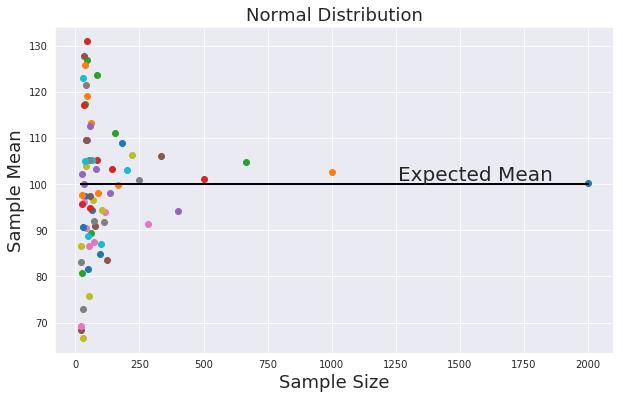

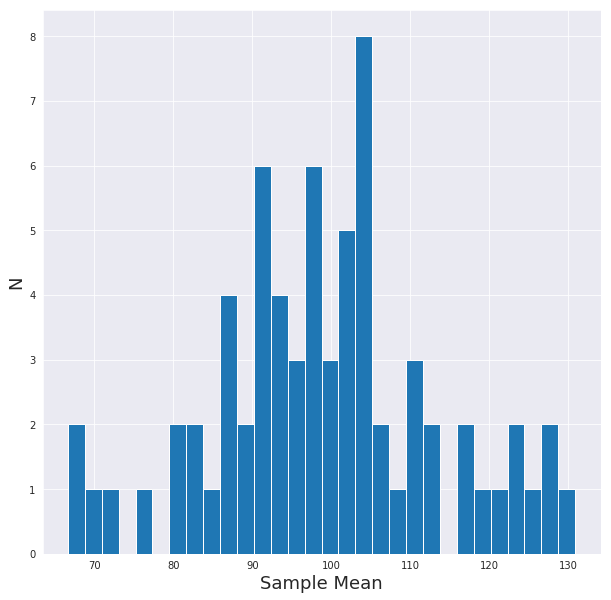

In [48]:
################################################################
#Geometric Distribution
################################################################

#Finding Parameters based on chi-square example and mymean=100
geomp = 1/(mymean+1)

#Makes it reproducible and deterministic
np.random.seed(703)

#Make the lnorm dictionary entry a nested dictionary
md['geom'] = {} 

#Reuse mysize as array for dictionary entries
for n in mysize:
    #Stores each sample size as dict key, vale is an array of mysize length
    md['geom'][n] = np.random.geometric(p = geomp, size = n)

md['geom']['means'] = {} #Creation of means entry array for plotting
axgeom_mu_n = pl.figure(figsize=(10,6)).add_subplot(111) #Initialization of plot

#For loop iterates over all dictionary entries for the lnorm
for entry in md['geom']:
    #This asks if the dictionary entry is a string
      #The sample sizes are also stored as dictionary elements so this lets you
      #work with these while having the ease of strings for other information
      #inside dictionary
    if not type(entry) == str:
        md['geom']['means'][entry] = md['geom'][entry].mean()
        #and plot it
        #Plots the mean just found as a circle
        axgeom_mu_n.plot(entry, md['geom']['means'][entry], 'o')
        #Plot Labels
        axgeom_mu_n.set_xlabel('Sample Size', fontsize=18)
        axgeom_mu_n.set_ylabel('Sample Mean', fontsize=18)
        axgeom_mu_n.set_title('Normal Distribution', fontsize=18)
        #Creats line plot for the expected mean
        #Extends from the smallest value of mysize to largest
        #Both endpoints equal mean so it plots a horizontal line
        #The k style marker marks the line as black
        axgeom_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')
        
#After for loop, labels the horizontal line
axgeom_mu_n.text(axbin_mu_n.get_xlim()[1] * .6, 100, "Expected Mean", 
                  va="bottom", fontsize=20)

###############################################################################
#BEGIN HISTOGRAM
#Creates list of means for histogram
allmeans = list(md['geom']['means'].values())
#Initalize histogram
pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('Sample Mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

# 667 students: fita  a Gaussian to the histogram of the means for each distribution

to fit a curve to data you can, for example, use scipy.optimize.curve_fit(). Your y value should be the hight of each histogram bin, which you can extract by capturing the output of pl.hist() when you plot the histogram. 

(array([ 2.,  0.,  0.,  2.,  1.,  2.,  1.,  2.,  0.,  1.,  4.,  3.,  7.,
        10.,  5.,  3.,  9.,  5.,  3.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,
         1.,  1.,  0.,  1.]),
 array([ 95.31364808,  95.65634848,  95.99904888,  96.34174927,
         96.68444967,  97.02715007,  97.36985047,  97.71255087,
         98.05525127,  98.39795166,  98.74065206,  99.08335246,
         99.42605286,  99.76875326, 100.11145365, 100.45415405,
        100.79685445, 101.13955485, 101.48225525, 101.82495565,
        102.16765604, 102.51035644, 102.85305684, 103.19575724,
        103.53845764, 103.88115804, 104.22385843, 104.56655883,
        104.90925923, 105.25195963, 105.59466003]),
 <a list of 30 Patch objects>)

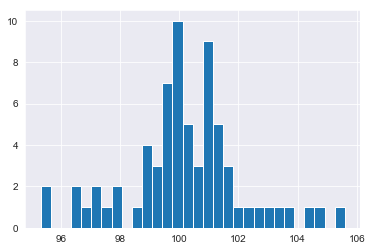

In [0]:
pl.hist(allmeans,bins=30)

And you can create your own Gaussian function to pass to curve_fit as this for example: 

In [0]:
def gaussian(x, mu, sigma....):
    ''' 
    REMEMBER TO WRITE A DOCSTRING THAT EXPLAINS WHAT A FUNCTION DOES EVERY TIME YOU WRITE A FUNCTION 
    https://www.python.org/dev/peps/pep-0257/
    '''

Or you can use existing functions (scipy has one, but it would be instructive for you to write it yourself!)